# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Gerando a tabela cruzada
ct = pd.crosstab(df['sex'], df['flag_doente'], margins = True)

saudaveis = ct.loc['All', 0] # Número de saudáveis
doentes = ct.loc['All', 1] # Número de doentes
total = ct.loc['All', 'All'] # Total
media_doentes = doentes / total # Quantidade média de doentes
odds = doentes / saudaveis # Odds
# Odds ratio usando o total como referência
odds_ratio = (ct.loc[1, 1] / ct.loc[1, 'All']) / (ct.loc[0, 1] / ct.loc[0, 'All'])
logito = np.log(odds) # Logito
log_odds_ratio = np.log(odds_ratio) # LOG do Odds ratio (com o total como referência)
woe = log_odds_ratio * media_doentes # Weight of Evidence (WOE)

# Exibição dos resultados
print("• Número de saudáveis:", saudaveis)
print("• Número de doentes:", doentes)
print("• Total:", total)
print(f"• Quantidade média de doentes: {media_doentes: .2f}")
print(f"• Odds: {odds: .2f}")
print(f"• Odds ratio: {odds_ratio: .2f}")
print(f"• Logito: {logito: .2f}")
print(f"• LOG do Odds ratio: {log_odds_ratio: .2f}")
print(f"• Weight of Evidence (WOE): {woe: .2f}")

ct # Exibindo a tabela cruzada

• Número de saudáveis: 164
• Número de doentes: 139
• Total: 303
• Quantidade média de doentes:  0.46
• Odds:  0.85
• Odds ratio:  2.15
• Logito: -0.17
• LOG do Odds ratio:  0.76
• Weight of Evidence (WOE):  0.35


flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [5]:
# Categorizando a variável em 5 grupos
df['age_group'] = pd.cut(df['age'], bins = 5)

# Gerando a tabela cruzada
ct_age = pd.crosstab(df['age_group'], df['flag_doente'], margins = True)

# Exibição dos resultados
# Iterando sobre as linhas da tabela cruzada
for index, row in ct_age.iterrows():
    # Extraindo a categoria da idade
    age_category = index
    
    # Extraindo o número de doentes, saudáveis e total
    num_doentes = row[1]
    num_saudaveis = row[0]
    total = row['All']
    
    # Calculando métricas
    media_doentes_age = num_doentes / total
    odds_age = num_doentes / num_saudaveis
    odds_ratio_age = (ct_age.loc['All', 1] / ct_age.loc['All', 'All']) / (ct_age.loc['All', 0] / ct_age.loc['All', 'All'])
    logito_age = np.log(odds_age)
    log_odds_ratio_age = np.log(odds_ratio_age)
    woe_age = log_odds_ratio_age * media_doentes_age
    
    # Exibindo a informação formatada
    print(f"Categoria {index}:\n"
          f"• Número de Saudáveis: {num_saudaveis},\n"
          f"• Número de Doentes: {num_doentes},\n"
          f"• Total: {total}\n"
          f"• Quantidade média de doentes: {media_doentes_age:.2f}\n"
          f"• Odds: {odds_age:.2f}\n"
          f"• Odds ratio: {odds_ratio_age:.2f}\n"
          f"• Logito: {logito_age:.2f}\n"
          f"• LOG do Odds ratio: {log_odds_ratio_age:.2f}\n"
          f"• Weight of Evidence: {woe_age:.2f}\n")

ct_age # Exibindo a tabela cruzada

Categoria (28.952, 38.6]:
• Número de Saudáveis: 8,
• Número de Doentes: 3,
• Total: 11
• Quantidade média de doentes: 0.27
• Odds: 0.38
• Odds ratio: 0.85
• Logito: -0.98
• LOG do Odds ratio: -0.17
• Weight of Evidence: -0.05

Categoria (38.6, 48.2]:
• Número de Saudáveis: 50,
• Número de Doentes: 21,
• Total: 71
• Quantidade média de doentes: 0.30
• Odds: 0.42
• Odds ratio: 0.85
• Logito: -0.87
• LOG do Odds ratio: -0.17
• Weight of Evidence: -0.05

Categoria (48.2, 57.8]:
• Número de Saudáveis: 56,
• Número de Doentes: 41,
• Total: 97
• Quantidade média de doentes: 0.42
• Odds: 0.73
• Odds ratio: 0.85
• Logito: -0.31
• LOG do Odds ratio: -0.17
• Weight of Evidence: -0.07

Categoria (57.8, 67.4]:
• Número de Saudáveis: 40,
• Número de Doentes: 67,
• Total: 107
• Quantidade média de doentes: 0.63
• Odds: 1.68
• Odds ratio: 0.85
• Logito: 0.52
• LOG do Odds ratio: -0.17
• Weight of Evidence: -0.10

Categoria (67.4, 77.0]:
• Número de Saudáveis: 10,
• Número de Doentes: 7,
• Total: 17
•

flag_doente,0,1,All
age_group,,,
"(28.952, 38.6]",8,3,11
"(38.6, 48.2]",50,21,71
"(48.2, 57.8]",56,41,97
"(57.8, 67.4]",40,67,107
"(67.4, 77.0]",10,7,17
All,164,139,303


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

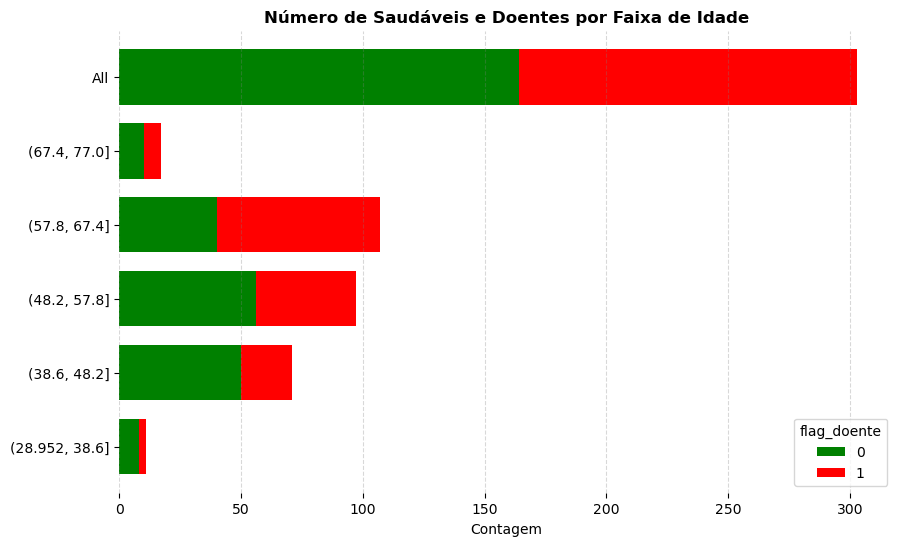

In [6]:
# Plotagem do número de saudáveis e doentes por idade
fig, ax = plt.subplots(figsize = (10, 6))
ct_age[[0, 1]].plot(kind = 'barh', stacked = True, ax = ax, width = .75, color = ['green', 'red'])
ax.set_xlabel('Contagem')
ax.set_ylabel('')
ax.set_title('Número de Saudáveis e Doentes por Faixa de Idade', fontweight='bold')

# Adicionando linhas tracejadas cinzas no grid vertical
ax.grid(axis='x', linestyle='--', color='gray', alpha=0.3)

# Removendo bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()